In [180]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

In [181]:
prod_data = pd.read_csv('production_data.csv')
wells_data =  pd.read_csv('wellsData.csv')
op_aliasing_data = pd.read_csv('operator_aliasing.csv')

C:\Users\Nourhan Khaled\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (21,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [182]:
# dropping unnecessary columns from tables
cols = ['API', 'Year', 'Month', 'Liquid', 'Gas', 'RatioGasOil']
prod_data = prod_data[cols]

cols = ['API', 'SpudDate', 'CompletionDate', 'operatorNameIHS', 'BasinName']
wells_data = wells_data[cols]

cols = ['Name', 'Alias']
op_aliasing_data = op_aliasing_data[cols]

In [183]:
# adding zeros to API
wells_data['API'] = (wells_data['API']).astype(str)
wells_data['API'] = wells_data['API'].apply(lambda x: x.zfill(14))

In [184]:
# adding zeros to API
prod_data['API'] = (prod_data['API']).astype(str)
prod_data['API'] = prod_data['API'].apply(lambda x: x.zfill(14))

In [185]:
# renaming operators
alias_dict = dict(zip(op_aliasing_data.Name, op_aliasing_data.Alias))
wells_data['operatorNameIHS'] = wells_data['operatorNameIHS'].map(alias_dict).fillna(wells_data['operatorNameIHS'])

In [217]:
idx_max = prod_data.groupby(['API'])['Liquid'].transform('max') == prod_data['Liquid']
max_month_prod_data = prod_data[idx_max].drop_duplicates(subset='API', keep='first', inplace=False)
list_indices = ['API', 'Year', 'Month', 'Liquid']
max_month_prod_data = max_month_prod_data[list_indices]
max_month_prod_data = max_month_prod_data.rename(columns={"Year": "Max_Year", "Month": "Max_Month", "Liquid": "Max_Liquid"})
idx_max

0          False
1          False
2          False
3           True
4          False
5          False
6           True
7           True
8           True
9           True
10          True
11          True
12          True
13          True
14          True
15          True
16          True
17          True
18          True
19          True
20          True
21         False
22         False
23          True
24         False
25         False
26         False
27         False
28         False
29          True
           ...  
3703346     True
3703347    False
3703348    False
3703349    False
3703350    False
3703351    False
3703352    False
3703353    False
3703354    False
3703355    False
3703356    False
3703357     True
3703358    False
3703359    False
3703360    False
3703361    False
3703362    False
3703363     True
3703364    False
3703365     True
3703366    False
3703367    False
3703368     True
3703369    False
3703370    False
3703371    False
3703372    False
3703373    Fal

In [216]:
# merging the two dataframes to get max month and max year
new_prod_data_orig = prod_data.merge(max_month_prod_data, on='API')
print(len(new_prod_data_orig), len(prod_data))

3703376 3703376


In [215]:
# Remove Pre-Peak Months (clean up)
new_prod_data = new_prod_data_orig[((new_prod_data_orig['Year'] == new_prod_data_orig['Max_Year']))]
new_prod_data = new_prod_data[(new_prod_data['Month'] >= new_prod_data['Max_Month'])]

new_prod_data2 = new_prod_data_orig[((new_prod_data_orig['Year'] > new_prod_data_orig['Max_Year']))]
new_prod_data3 = new_prod_data.append(new_prod_data2)
new_prod_data3

,API,Year,Month,Liquid,Gas,RatioGasOil,Max_Year,Max_Month,Max_Liquid
4,35045231810000,2012,12,0,10666,0.000000,2012,11,177
9,35029211390000,2012,3,0,0,0.000000,2012,2,0
10,35029211390000,2012,4,0,0,0.000000,2012,2,0
11,35029211390000,2012,5,0,0,0.000000,2012,2,0
12,35029211390000,2012,6,0,0,0.000000,2012,2,0
13,35029211390000,2012,7,0,0,0.000000,2012,2,0
14,35029211390000,2012,8,0,0,0.000000,2012,2,0
15,35029211390000,2012,9,0,0,0.000000,2012,2,0
16,35029211390000,2012,10,0,0,0.000000,2012,2,0
17,35029211390000,2012,11,0,0,0.000000,2012,2,0


In [189]:
def calc_month_index(max_year, max_month, year, month):
    return (12 - max_month + (year - max_year - 1)*12 + month) * (year != max_year) + (year == max_year) * (month - max_month) + 1 

In [190]:
new_prod_data3['index'] = calc_month_index(new_prod_data3['Max_Year'], new_prod_data3['Max_Month'], new_prod_data3['Year'], new_prod_data3['Month'])
indexed_prod_data = new_prod_data3

# Problems encountered

## 1) 0 max liquid production, fixed by setting first month as peek month
## 2) missing months data in indexing months, fixed by super smart indexing equation
## 3) missing month data in plotting, will be fixed by moving average inshaAllah
## 4) UNKNOWN alias and operator
## 5) CompletionDate removed Nulls and replaced them with Non-null Spuddates + six months

In [191]:
# removed nullified SpudDates and CompletionDates
wells_data = wells_data[~((wells_data['SpudDate'].isnull()) & (wells_data['CompletionDate'].isnull()))]

In [192]:
# replacing null CompletionDates with SpudDates + six months
wells_data['SpudDate'] = pd.to_datetime(wells_data['SpudDate'])
wells_data['CompletionDate'] = pd.to_datetime(wells_data['CompletionDate'])
wells_data.loc[wells_data['CompletionDate'].isnull(), 'CompletionDate'] = wells_data['SpudDate'] + timedelta(days=170) 

In [193]:
# Dropping SpudDate column
cols = ['API', 'CompletionDate', 'operatorNameIHS', 'BasinName']
wells_data = wells_data[cols]

In [194]:
wells_data_4basins = wells_data[wells_data['BasinName'] == 'DENVER BASIN']
wells_data_4basins = wells_data_4basins.append(wells_data[wells_data['BasinName'] == 'PERMIAN BASIN'])
wells_data_4basins = wells_data_4basins.append(wells_data[wells_data['BasinName'] == 'ANADARKO BASIN'])
wells_data_4basins = wells_data_4basins.append(wells_data[wells_data['BasinName'] == 'WILLISTON BASIN'])
wells_data_4basins['API'] = wells_data_4basins['API'].astype(str)

In [195]:
indexed_wells_4basins = wells_data_4basins.merge(indexed_prod_data, on='API')

In [196]:
print(indexed_wells_4basins.groupby('BasinName'))
indexed_wells_4basins.groupby('index').mean()


,Year,Month,Liquid,Gas,RatioGasOil,Max_Year,Max_Month,Max_Liquid
index,,,,,,,,
1,2014.686506,6.643014,14756.049408,31015.866847,18.425349,2014.686506,6.643014,14781.343596
2,2014.714427,6.642807,10583.850130,27480.868119,30.444280,2014.635523,6.589662,14763.728764
3,2014.742503,6.733979,8485.865576,24454.298706,24.803495,2014.591030,6.551662,14677.663875
4,2014.787910,6.595492,7227.618924,22218.743044,20.554074,2014.543887,6.523759,14593.175050
5,2014.804368,6.701612,6271.884553,20431.160878,19.764677,2014.487277,6.506710,14465.736210
6,2014.837825,6.601953,5563.189260,18869.048794,24.487627,2014.429205,6.505399,14335.889071
7,2014.877807,6.491009,4990.200402,17456.167135,28.826315,2014.375397,6.519935,14225.192108
8,2014.896014,6.549294,4555.616283,16404.994578,33.266027,2014.312632,6.549876,14105.284897
9,2014.932227,6.434203,4175.499704,15372.818595,41.505832,2014.251994,6.597009,13974.515606


In [197]:
def get_stats(basin, index, table):
    group = table[(table['BasinName'] == basin) & (table['index'] == index)]
    group_liquid = group["Liquid"]
    mean = group_liquid.mean()
    median = group_liquid.median()
    perct = group_liquid.quantile(.9)
    liquid = group_liquid
    return [[mean], [median], [perct], liquid]

def mean_basin(basin, index, table):
    group = table[(table['BasinName'] == basin) & (table['index'] == index)] 
    return group["Liquid"].mean()

def median_basin(basin, index, table):
    group = table[(table['BasinName'] == basin) & (table['index'] == index)] 
    return group["Liquid"].median()

def percentile(basin, index, table):
    group = table[(table['BasinName'] == basin) & (table['index'] == index)] 
    return group["Liquid"].quantile(.9)

def liquid(basin, index, table):
    group = table[(table['BasinName'] == basin) & (table['index'] == index)] 
    return group['Liquid']




In [198]:
pre2014 = indexed_wells_4basins[indexed_wells_4basins['CompletionDate'] < '2014-01-01']
post2014 = indexed_wells_4basins[indexed_wells_4basins['CompletionDate'] >= '2014-01-01']
indices = np.arange(36) + 1
basins = ["ANADARKO BASIN","DENVER BASIN", "PERMIAN BASIN", "WILLISTON BASIN"]

all_stats_pre = np.array([[get_stats(y, x, pre2014) for x in indices] for y in basins]) 
all_stats_post = np.array([[get_stats(y, x, post2014) for x in indices] for y in basins]) 

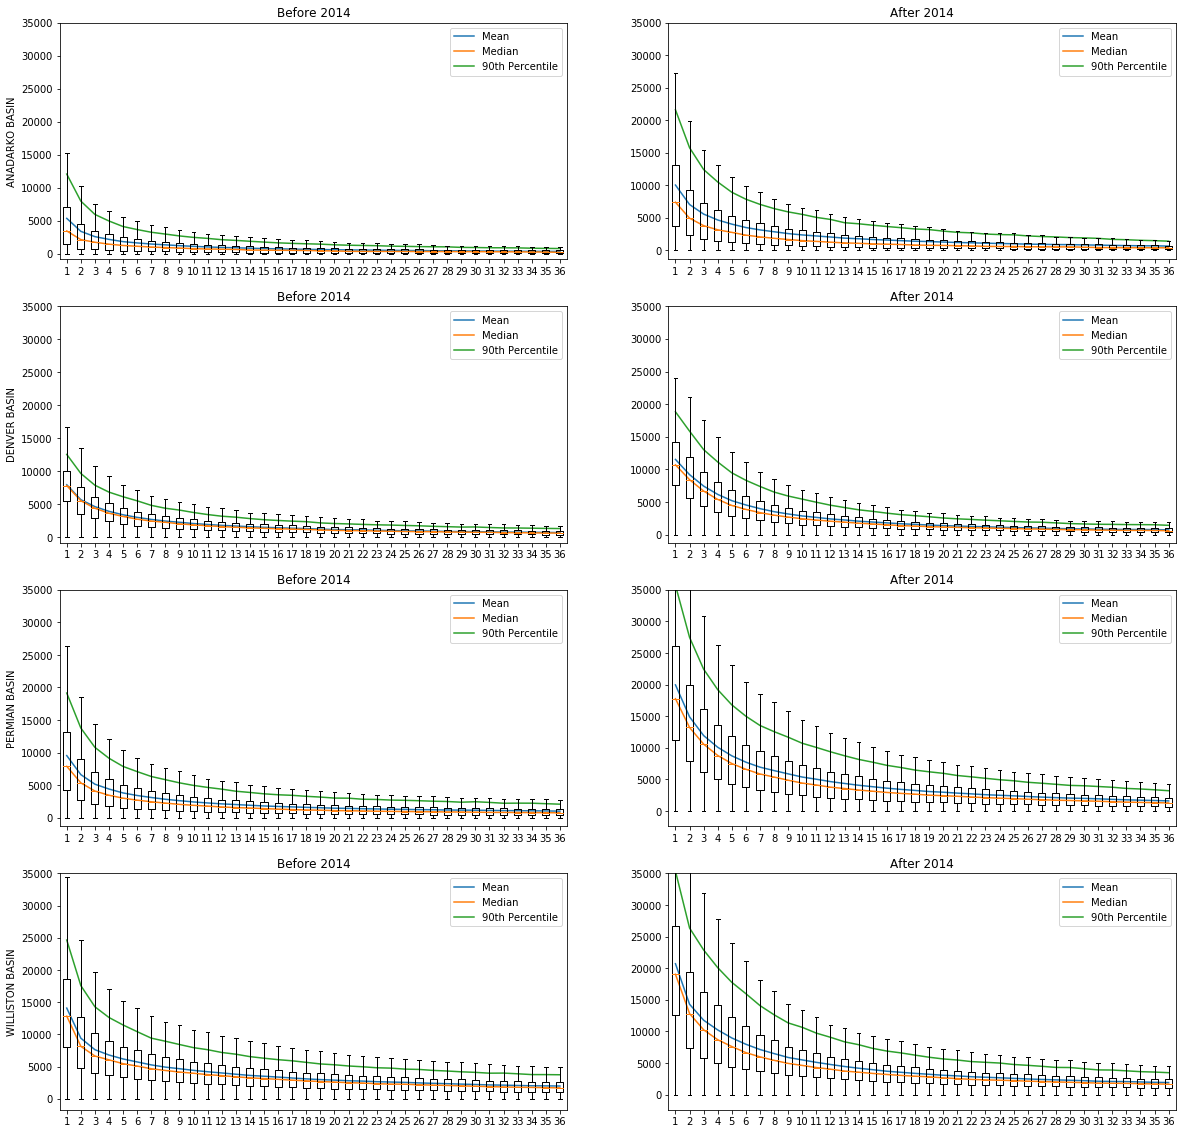

In [199]:
plt.rcParams["figure.figsize"]=20,20

idx = 1
for i in range(len(basins)):

    ax1 = plt.subplot(4,2,idx)
    ax1.plot(indices, np.hstack(all_stats_pre[i,:,0]), label="Mean")
    ax1.plot(indices, np.hstack(all_stats_pre[i,:,1]), label="Median")
    ax1.plot(indices, np.hstack(all_stats_pre[i,:,2]), label="90th Percentile")
    ax1.boxplot(list(all_stats_pre[i,:,3]), showfliers=False)
    ax1.set_ylim(top=35000)
    ax1.legend()
    ax1.set_title('Before 2014')
    ax1.set_ylabel(basins[i])
    idx += 1

    ax2 = plt.subplot(4,2,idx)
    ax2.plot(indices, np.hstack(all_stats_post[i,:,0]), label="Mean")
    ax2.plot(indices, np.hstack(all_stats_post[i,:,1]), label="Median")
    ax2.plot(indices, np.hstack(all_stats_post[i,:,2]), label="90th Percentile")
    ax2.boxplot(list(all_stats_post[i,:,3]), showfliers=False)
    ax2.set_ylim(top=35000)
    ax2.set_title('After 2014')
    ax2.legend()
    
    idx += 1
    
plt.savefig('part1.png')



In [200]:
#remove months larger than 60
five_years_data = indexed_wells_4basins
five_years_data['max_index_five_years'] = five_years_data['index'].groupby(five_years_data['API']).transform("max")
five_years_data = five_years_data[five_years_data['max_index_five_years'] >= 60]
five_years_data = five_years_data[five_years_data['index'] <= 60]

In [201]:
def cumm_prod_basin_year(basin, table):
    total = table[(table['BasinName'] == basin)]
    total_liquid = total["Liquid"].sum()
    percents = np.zeros(5)
    for year in range(5):
        lower = (year)*12
        upper = (year + 1)*12
        group = total[(total['index'] > lower) & (total['index'] <= upper)]['Liquid']
        group_liquid = group.sum()
        percents[year] = ((group_liquid*100)/total_liquid)                
        
    return percents
    

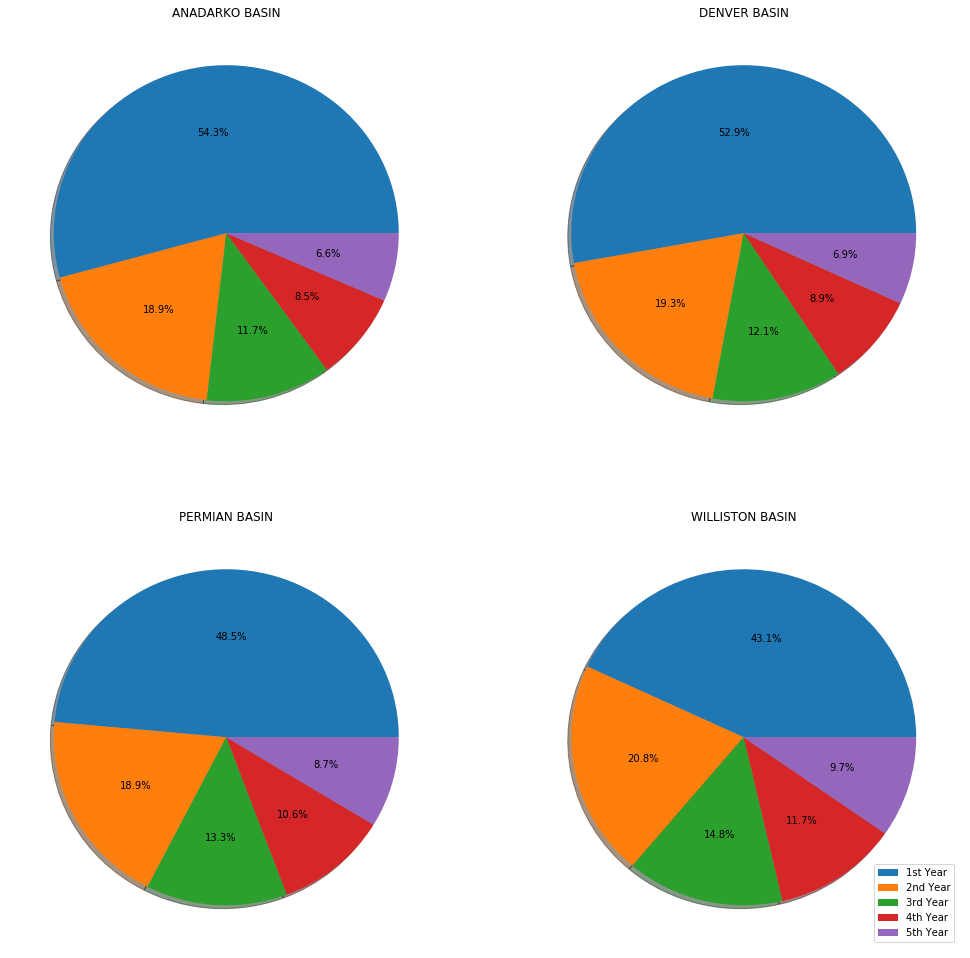

In [202]:
percentages = [cumm_prod_basin_year(y, five_years_data) for y in basins ]

plt.rcParams["figure.figsize"]=17,17
labels = ['1st Year', '2nd Year', '3rd Year', '4th Year', '5th Year']
for i in range(len(basins)):

    ax1 = plt.subplot(2,2,i+1)
    ax1.pie(percentages[i], autopct='%1.1f%%', shadow=True)
    ax1.set_title(basins[i])

plt.legend(labels, loc=4)
plt.savefig('Plot2.png')
    

49780.68256041803 ANADARKO BASIN
81121.43232044199 DENVER BASIN
104856.64216366159 PERMIAN BASIN
180884.40441914965 WILLISTON BASIN


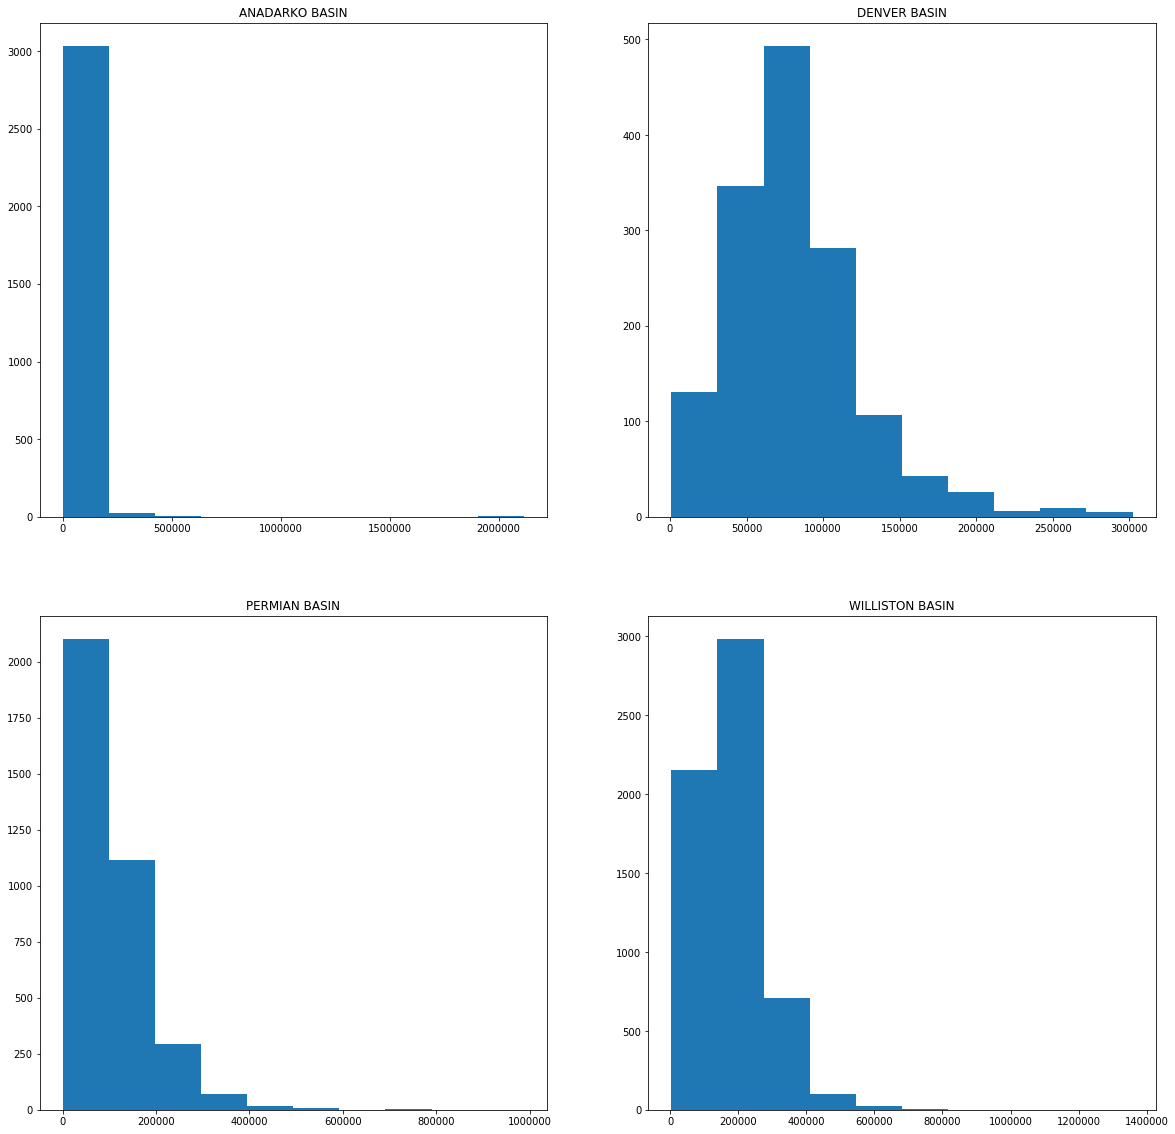

In [210]:
def cumm_prod_wells(table, basin):
    total = table[(table['BasinName'] == basin)]
    sums = total.groupby(total['API'])['Liquid'].sum()
    return sums

def ugly_loops(table, basin):
    total = table[(table['BasinName'] == basin)]    
    apis = total['API'].unique()
    sums = np.zeros(len(apis))
    for i in range(len(apis)):
        sums[i] = total[total['API'] == apis[i]]['Liquid'].sum()
    return sums
        

plt.rcParams["figure.figsize"] = 20,20
x = [cumm_prod_wells(five_years_data, y) for y in basins]

for i in range(len(basins)):
    ax1 = plt.subplot(2,2,i+1)
    ax1.hist(x[i])
    print(x[i].mean(), basins[i])
    ax1.set_title(basins[i])

plt.savefig('Plot3.png')
    
#print(cumm_prod_wells(five_years_data, "DENVER BASIN"))
# x = cumm_prod_wells(five_years_data, "ANADARKO BASIN")
# plt.hist(x)


In [159]:
five_years_data

,API,CompletionDate,operatorNameIHS,BasinName,Year,Month,Liquid,Gas,RatioGasOil,Max_Year,Max_Month,Max_Liquid,index,max_index_five_years
183,05123363860000,2013-04-02,BONANZA CREEK,DENVER BASIN,2013,4,4197,4699,1.119609,2013,4,4197,1,67
184,05123363860000,2013-04-02,BONANZA CREEK,DENVER BASIN,2013,5,2899,11972,4.129700,2013,4,4197,2,67
185,05123363860000,2013-04-02,BONANZA CREEK,DENVER BASIN,2013,6,1953,7675,3.929852,2013,4,4197,3,67
186,05123363860000,2013-04-02,BONANZA CREEK,DENVER BASIN,2013,7,1357,7583,5.588062,2013,4,4197,4,67
187,05123363860000,2013-04-02,BONANZA CREEK,DENVER BASIN,2013,8,1099,3819,3.474977,2013,4,4197,5,67
188,05123363860000,2013-04-02,BONANZA CREEK,DENVER BASIN,2013,9,924,3900,4.220779,2013,4,4197,6,67
189,05123363860000,2013-04-02,BONANZA CREEK,DENVER BASIN,2013,10,619,4416,7.134087,2013,4,4197,7,67
190,05123363860000,2013-04-02,BONANZA CREEK,DENVER BASIN,2013,11,1017,2687,2.642085,2013,4,4197,8,67
191,05123363860000,2013-04-02,BONANZA CREEK,DENVER BASIN,2013,12,1091,3882,3.558203,2013,4,4197,9,67
192,05123363860000,2013-04-02,BONANZA CREEK,DENVER BASIN,2014,1,761,4418,5.805519,2013,4,4197,10,67
